In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Uber=pd.read_csv("uber_rides_dataset.csv")

In [15]:
Uber.head()


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,25-02-2016 04:26,02-03-2016 00:32,Business,San Francisco,Los Angeles,45.15,Errand
1,22-12-2016 07:30,28-03-2016 05:07,Personal,Chicago,Boston,41.70,Other
2,16-07-2016 07:36,22-03-2016 19:11,Business,San Francisco,New York,36.51,Meeting
3,13-12-2016 23:24,27-11-2016 09:12,Business,San Francisco,San Francisco,33.20,Meal
4,21-06-2016 09:38,06-06-2016 05:12,Business,Boston,New York,10.99,Meal


In [7]:
Uber.shape

(1156, 7)

In [9]:
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1156 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data preprocessing

In [11]:
Uber["PURPOSE"].fillna("NOT",inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20872\2858148041.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Uber["PURPOSE"].fillna("NOT",inplace=True)


In [52]:
mask = Uber['PURPOSE'] == "NOT"
NEW = Uber[mask]
NEW


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,HOURS,SHIFT


In [11]:
# here we are converting object datatype into date_time format..
Uber["START_DATE"] = pd.to_datetime(Uber["START_DATE"], errors='coerce')
Uber["END_DATE"] = pd.to_datetime(Uber["END_DATE"], errors='coerce')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18308\3994242957.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Uber["START_DATE"] = pd.to_datetime(Uber["START_DATE"], errors='coerce')


In [15]:
Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1156 non-null   datetime64[ns]
 1   END_DATE    477 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [17]:
from datetime import datetime

# Splitting date and time from 'START_DATE' column
Uber["DATE"] = pd.DatetimeIndex(Uber["START_DATE"]).date
Uber["TIME"] = pd.DatetimeIndex(Uber["START_DATE"]).time


In [19]:
Uber

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME
0,2016-02-25 04:26:00,2016-02-03 00:32:00,Business,San Francisco,Los Angeles,45.15,Errand,2016-02-25,04:26:00
1,2016-12-22 07:30:00,NaT,Personal,Chicago,Boston,41.70,Other,2016-12-22,07:30:00
2,2016-07-16 07:36:00,NaT,Business,San Francisco,New York,36.51,Meeting,2016-07-16,07:36:00
3,2016-12-13 23:24:00,NaT,Business,San Francisco,San Francisco,33.20,Meal,2016-12-13,23:24:00
4,2016-06-21 09:38:00,2016-06-06 05:12:00,Business,Boston,New York,10.99,Meal,2016-06-21,09:38:00
...,...,...,...,...,...,...,...,...,...
1151,2016-08-30 12:53:00,NaT,Personal,New York,Boston,29.82,NaN,2016-08-30,12:53:00
1152,2016-11-20 23:00:00,NaT,Personal,San Francisco,Los Angeles,29.45,NaN,2016-11-20,23:00:00
1153,2016-02-21 06:50:00,2016-07-09 19:43:00,Personal,Los Angeles,Chicago,36.73,NaN,2016-02-21,06:50:00
1154,2016-12-07 07:22:00,NaT,Personal,Chicago,Chicago,26.34,NaN,2016-12-07,07:22:00


In [54]:
# First, convert 'TIME' column to hours (as float)
Uber["HOURS"] = Uber["START_DATE"].dt.hour + Uber["START_DATE"].dt.minute / 60

# Then, apply pd.cut to categorize shifts
Uber["SHIFT"] = pd.cut(Uber["HOURS"], bins=[0, 10, 15, 19, 24], labels=["MORNING", "AFTERNOON", "EVENING", "NIGHT"], right=False)


In [58]:
Uber

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,HOURS,SHIFT
0,2016-02-25 04:26:00,2016-02-03 00:32:00,Business,San Francisco,Los Angeles,45.15,Errand,2016-02-25,04:26:00,4.433333,MORNING
4,2016-06-21 09:38:00,2016-06-06 05:12:00,Business,Boston,New York,10.99,Meal,2016-06-21,09:38:00,9.633333,MORNING
6,2016-12-13 12:49:00,2016-07-05 10:24:00,Business,Chicago,Boston,19.68,Meal,2016-12-13,12:49:00,12.816667,AFTERNOON
9,2016-01-26 18:03:00,2016-05-12 09:38:00,Personal,Chicago,Chicago,28.47,Customer Visit,2016-01-26,18:03:00,18.050000,EVENING
10,2016-03-14 01:38:00,2016-06-09 19:43:00,Business,San Francisco,New York,20.22,Meal,2016-03-14,01:38:00,1.633333,MORNING
...,...,...,...,...,...,...,...,...,...,...,...
633,2016-02-21 07:18:00,2016-11-08 12:17:00,Personal,Chicago,Boston,7.39,Customer Visit,2016-02-21,07:18:00,7.300000,MORNING
639,2016-07-15 14:04:00,2016-11-02 00:12:00,Personal,San Francisco,San Francisco,9.02,Errand,2016-07-15,14:04:00,14.066667,AFTERNOON
645,2016-07-21 22:18:00,2016-06-08 15:35:00,Personal,New York,San Francisco,33.09,Errand,2016-07-21,22:18:00,22.300000,NIGHT
648,2016-02-01 16:47:00,2016-01-06 18:19:00,Personal,Chicago,New York,42.64,Meal,2016-02-01,16:47:00,16.783333,EVENING


In [29]:
# here we are removing null values
Uber.dropna(inplace=True)

In [31]:
Uber.shape

(246, 11)

# in which category does the people book most rides

In [36]:
Uber["CATEGORY"].value_counts()

CATEGORY
Business    133
Personal    113
Name: count, dtype: int64

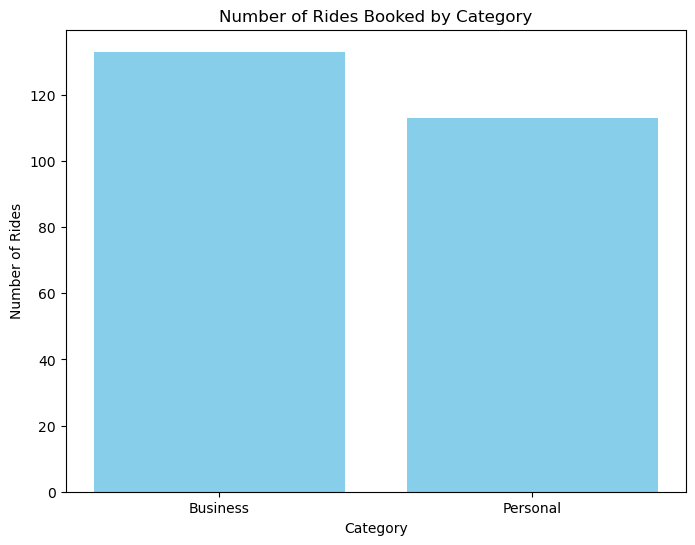

In [50]:
import matplotlib.pyplot as plt

# Count the number of rides in each category
category_counts = Uber["CATEGORY"].value_counts()

# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.title('Number of Rides Booked by Category')
plt.xlabel('Category')
plt.ylabel('Number of Rides')
plt.xticks(rotation=360)
plt.show()




**"For which purpose do people book Uber rides the most?"**

In [61]:
Uber["PURPOSE"].value_counts()

PURPOSE
Errand            54
Meal              53
Customer Visit    51
Other             45
Meeting           43
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18308\336832823.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette="coolwarm")


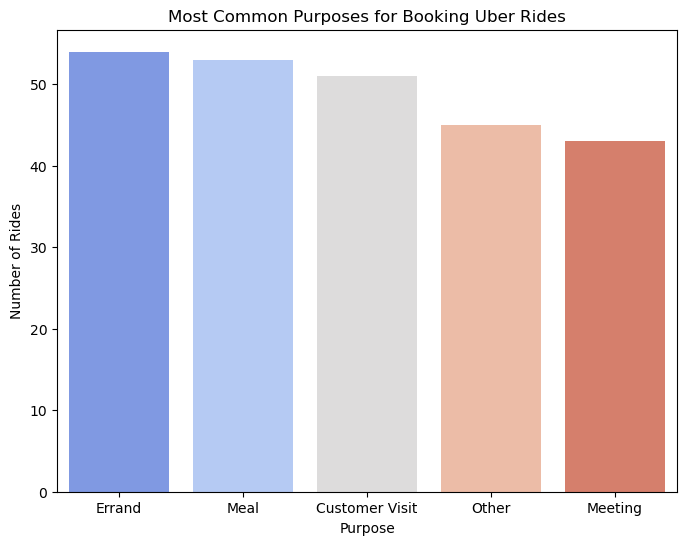

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts of each purpose
purpose_counts = Uber["PURPOSE"].value_counts()

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette="coolwarm")
plt.title('Most Common Purposes for Booking Uber Rides')
plt.xlabel('Purpose')
plt.ylabel('Number of Rides')
plt.xticks(rotation=360)
plt.show()


**"At what time do people book Uber cabs the most?"**

In [74]:
Uber["SHIFT"].value_counts()


SHIFT
MORNING      94
AFTERNOON    58
EVENING      50
NIGHT        44
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18308\1856497741.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shift_counts.index, y=shift_counts.values, palette="Spectral")


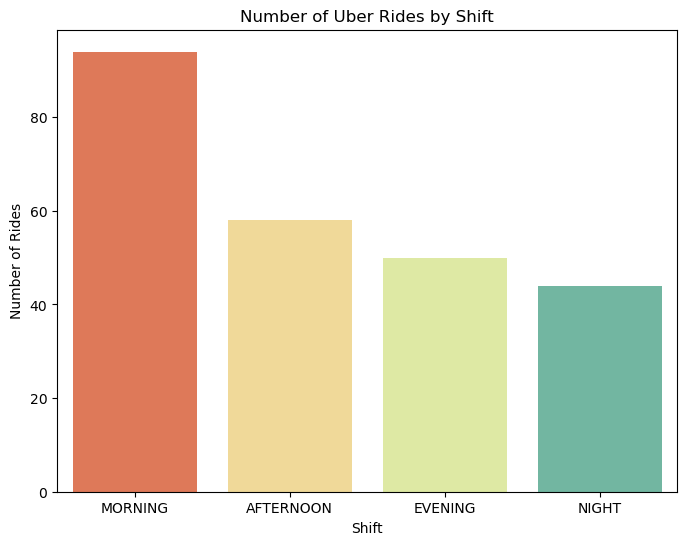

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get value counts
shift_counts = Uber["SHIFT"].value_counts()

# Plot with Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=shift_counts.index, y=shift_counts.values, palette="Spectral")
plt.title('Number of Uber Rides by Shift')
plt.xlabel('Shift')
plt.ylabel('Number of Rides')
plt.xticks(rotation=360)
plt.show()


# In which month do people book Uber rides less frequently

In [18]:
Uber["MONTH"] = pd.DatetimeIndex(Uber["START_DATE"]).month  # Extract the month from the START_DATE column

# Define the mapping of month numbers to month names
month_label = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 
               8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

# Map the month numbers to their corresponding names
Uber["month"] = Uber["MONTH"].map(month_label)

# Count the occurrences of each month
mon = Uber["month"].value_counts(sort=False)

print(mon)


month
Feb     79
Dec     84
Jul     97
Jun    110
Oct    106
Jan     94
Mar     89
Sep    104
Aug    102
Nov     92
Apr    101
May     98
Name: count, dtype: int64


In [16]:
Uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MONTH,month
0,25-02-2016 04:26,02-03-2016 00:32,Business,San Francisco,Los Angeles,45.15,Errand,2,Feb
1,22-12-2016 07:30,28-03-2016 05:07,Personal,Chicago,Boston,41.70,Other,12,Dec
2,16-07-2016 07:36,22-03-2016 19:11,Business,San Francisco,New York,36.51,Meeting,7,Jul
3,13-12-2016 23:24,27-11-2016 09:12,Business,San Francisco,San Francisco,33.20,Meal,12,Dec
4,21-06-2016 09:38,06-06-2016 05:12,Business,Boston,New York,10.99,Meal,6,Jun


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20872\3333013470.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mon.index, y=mon.values, palette="viridis")


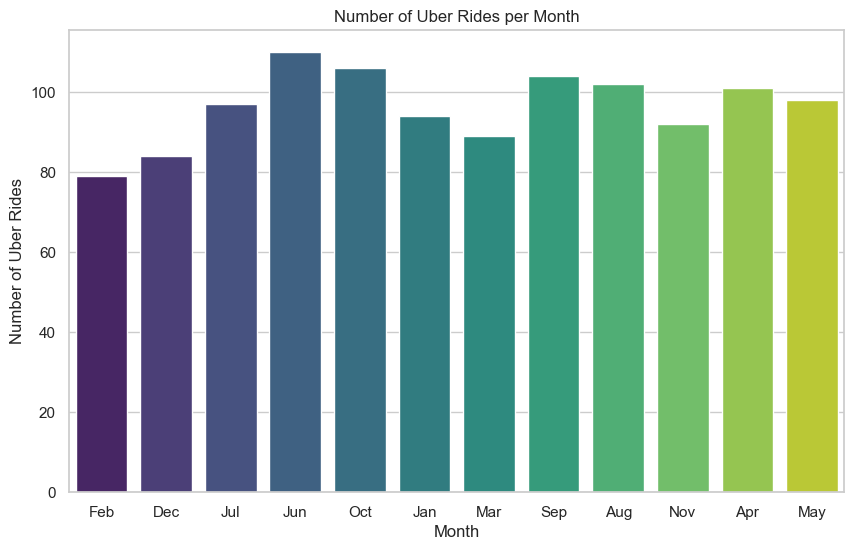

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the month counts using Seaborn
sns.barplot(x=mon.index, y=mon.values, palette="viridis")

# Set the labels and title
plt.xlabel("Month")
plt.ylabel("Number of Uber Rides")
plt.title("Number of Uber Rides per Month")

# Show the plot
plt.show()


# on which day of week do people book uber rides the most

In [21]:
# Extract the day of the week (Monday=0, Sunday=6)
Uber['Day'] = pd.to_datetime(Uber["START_DATE"]).dt.dayofweek

# Create a mapping for day labels
day_label = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}

# Map the day of the week to day names
Uber["Day"] = Uber["Day"].map(day_label)

# Count the occurrences of each day
day = Uber["Day"].value_counts()

print(day)


Day
Fri    183
Thu    173
Sun    166
Wed    166
Tue    159
Sat    156
Mon    153
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_644\2179816891.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Uber['Day'] = pd.to_datetime(Uber["START_DATE"]).dt.dayofweek


In [17]:
Uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,25-02-2016 04:26,02-03-2016 00:32,Business,San Francisco,Los Angeles,45.15,Errand
1,22-12-2016 07:30,28-03-2016 05:07,Personal,Chicago,Boston,41.70,Other
2,16-07-2016 07:36,22-03-2016 19:11,Business,San Francisco,New York,36.51,Meeting
3,13-12-2016 23:24,27-11-2016 09:12,Business,San Francisco,San Francisco,33.20,Meal
4,21-06-2016 09:38,06-06-2016 05:12,Business,Boston,New York,10.99,Meal


C:\Users\ASUS\AppData\Local\Temp\ipykernel_644\2987093493.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day.index, y=day.values, palette="coolwarm")


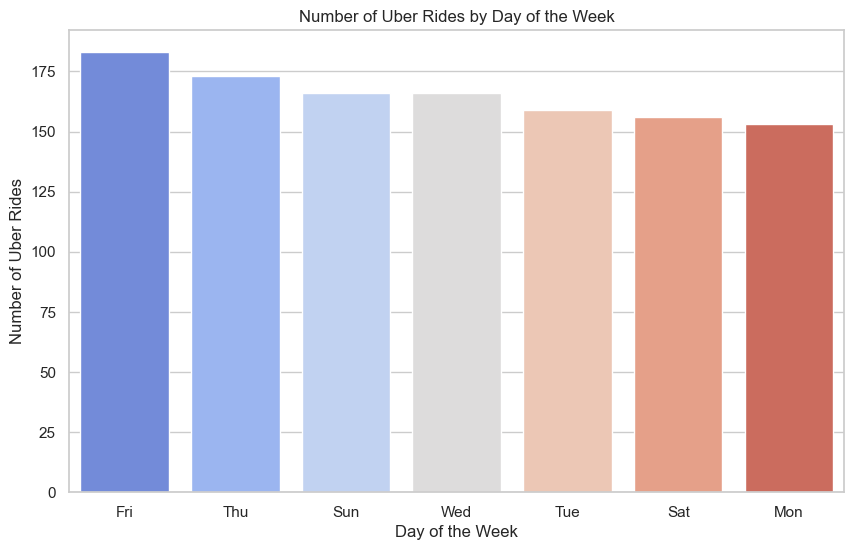

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the day counts using Seaborn
sns.barplot(x=day.index, y=day.values, palette="coolwarm")

# Set the labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Number of Uber Rides")
plt.title("Number of Uber Rides by Day of the Week")

# Show the plot
plt.show()


# how many miles do people usually book a cab through uber

In [8]:
Uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,25-02-2016 04:26,02-03-2016 00:32,Business,San Francisco,Los Angeles,45.15,Errand
1,22-12-2016 07:30,28-03-2016 05:07,Personal,Chicago,Boston,41.70,Other
2,16-07-2016 07:36,22-03-2016 19:11,Business,San Francisco,New York,36.51,Meeting
3,13-12-2016 23:24,27-11-2016 09:12,Business,San Francisco,San Francisco,33.20,Meal
4,21-06-2016 09:38,06-06-2016 05:12,Business,Boston,New York,10.99,Meal


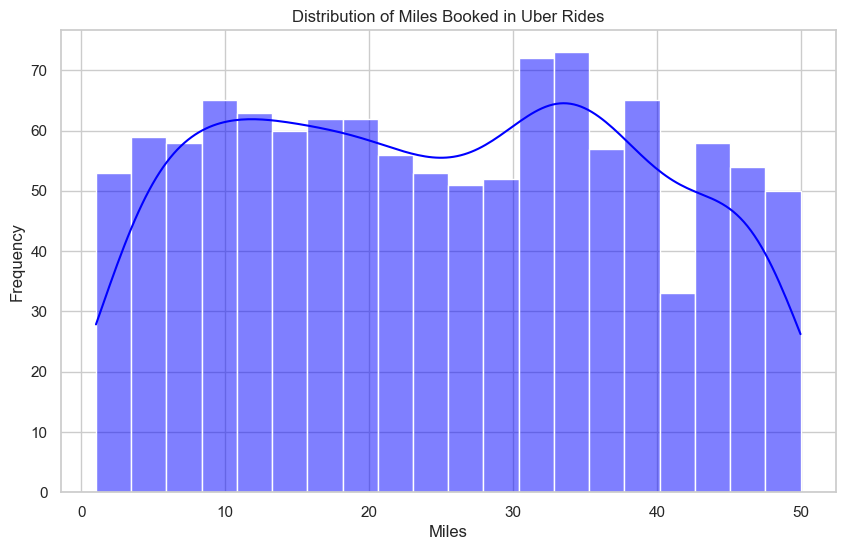

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot a histogram with Seaborn
sns.histplot(Uber['MILES'], bins=20, kde=True, color="blue")

# Set the labels and title
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.title("Distribution of Miles Booked in Uber Rides")

# Show the plot
plt.show()
